In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_kernel(shape, sigma):
    r,c = shape
    x = np.linspace(-(r-1)/2, r-1, r)
    y = np.linspace(-(c-1)/2, c-1, c)

    X,Y = np.meshgrid(x,y)
    kernel = (1/(2*np.pi*np.square(sigma))) * np.exp(-0.5 * (np.square(X) + np.square(Y))/np.square(sigma))
    Kernel = kernel / np.sum(kernel)
    return Kernel  
    
def GaussFilter(image, shape = (3,3), sigma = 3):
    gaussianKernel = gaussian_kernel(shape, sigma)
    blurred_image = cv2.filter2D(image, -1, gaussianKernel)
    return blurred_image

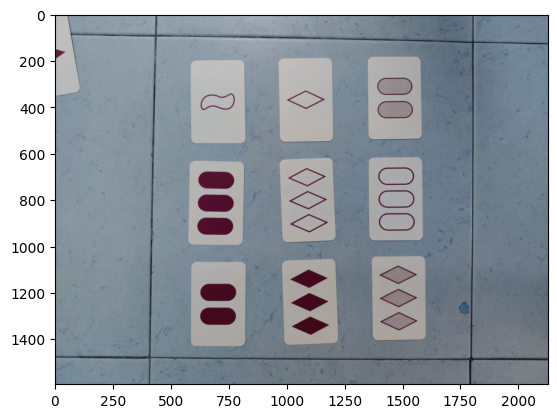

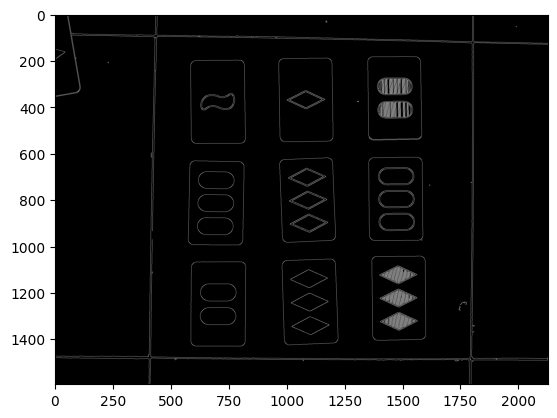

43


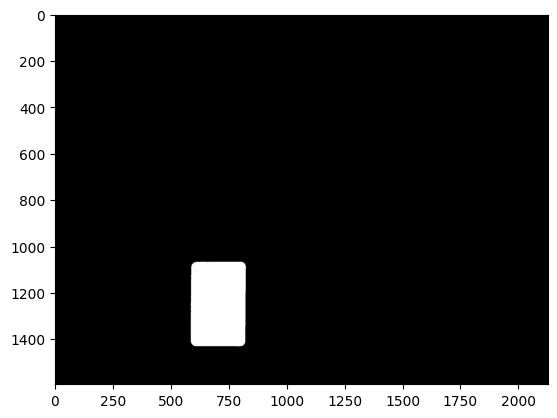

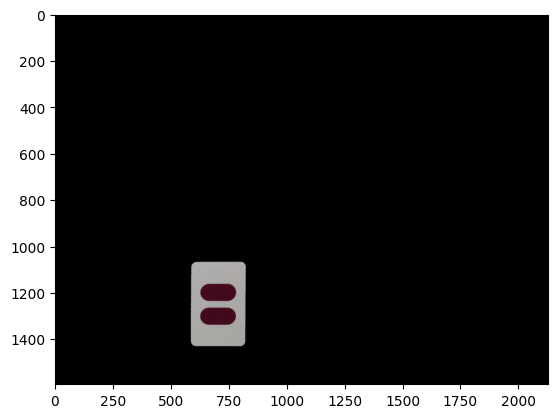

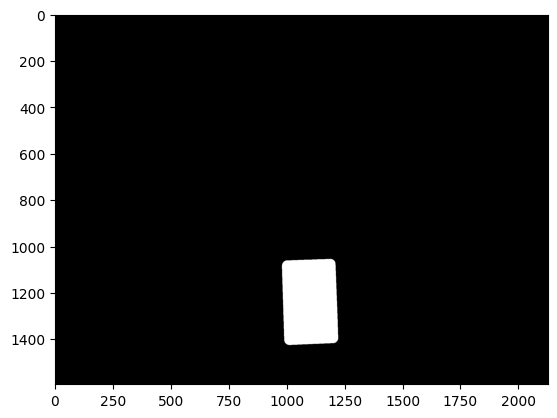

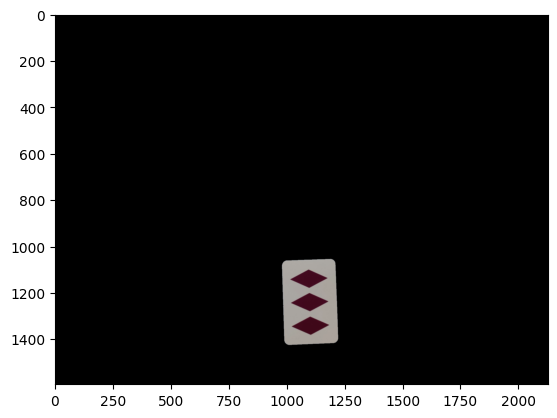

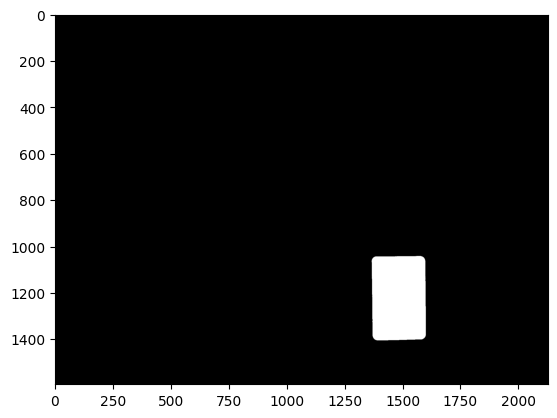

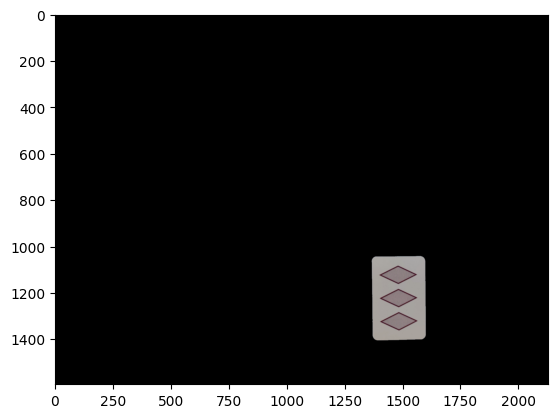

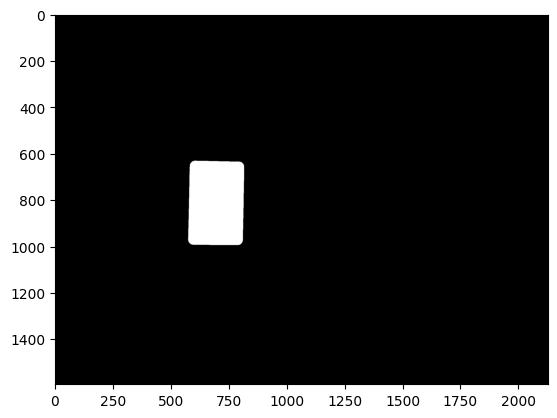

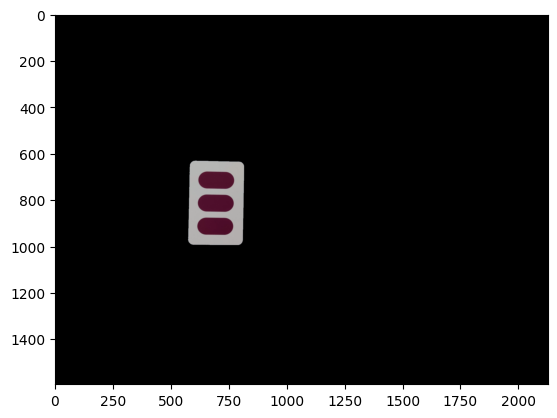

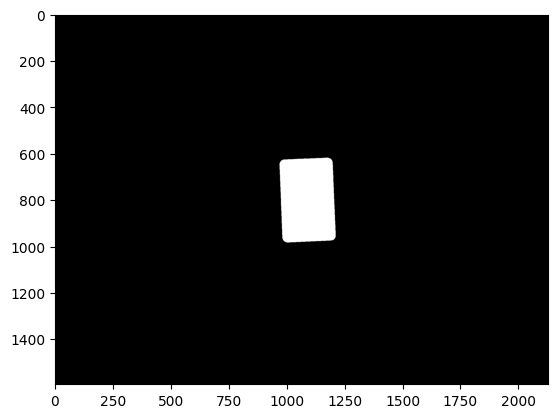

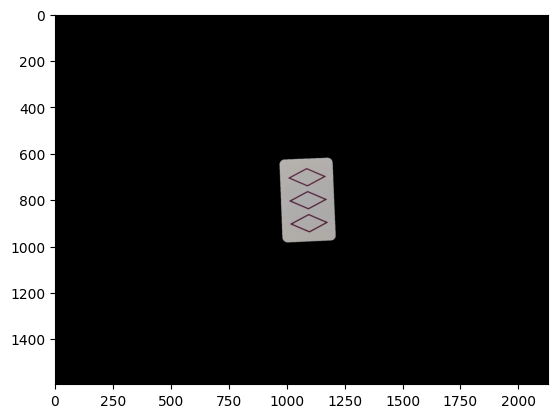

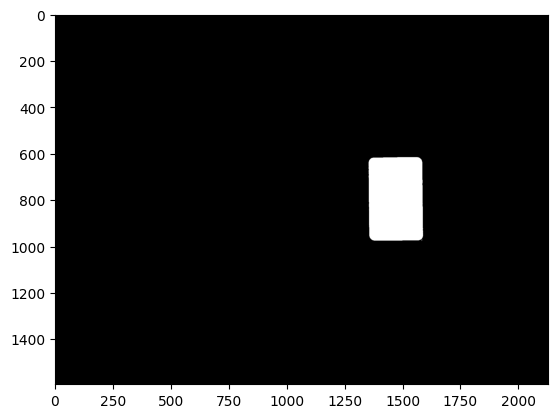

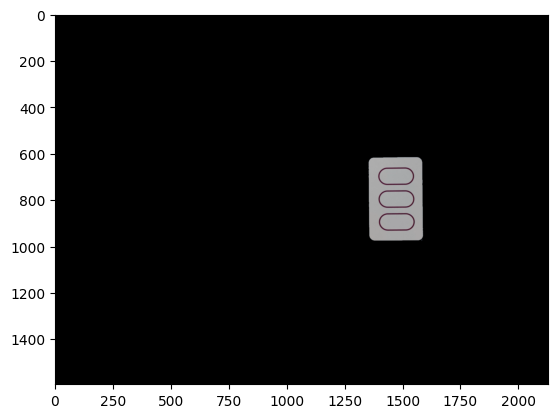

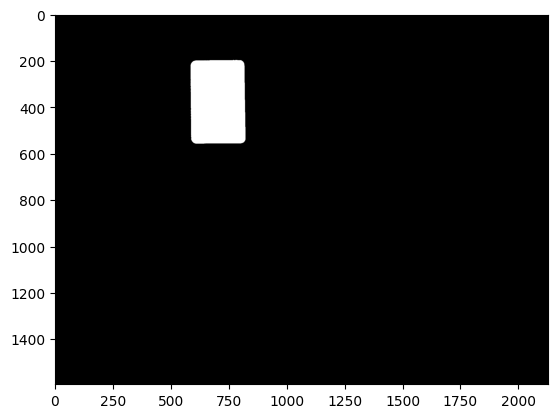

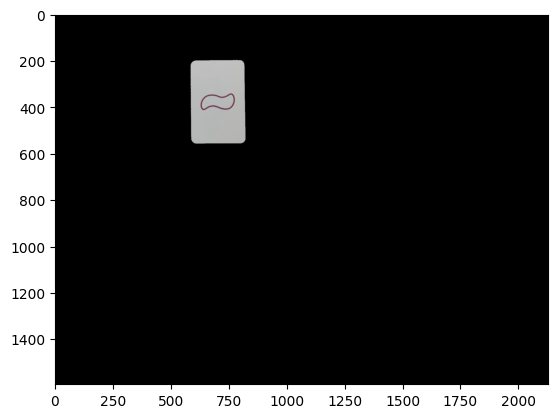

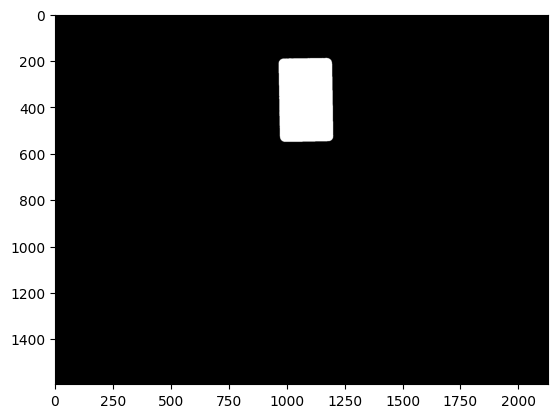

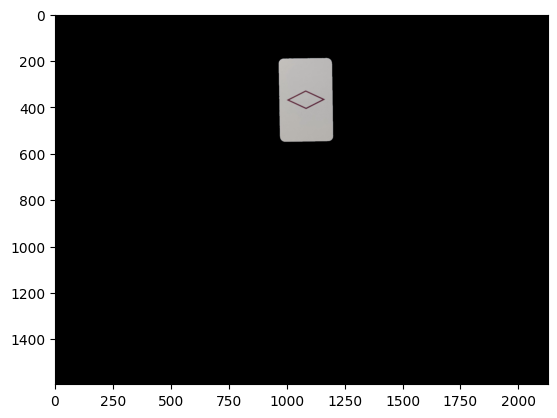

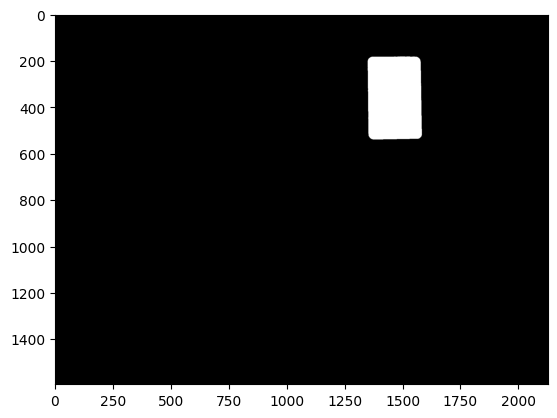

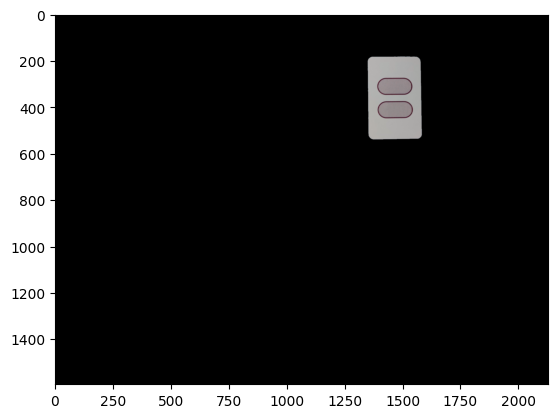

In [22]:
img = cv2.imread('Task 2/9B6hJ.jpg')
img = GaussFilter(img, (3, 3), 100)
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 200)

plt.imshow(canny, cmap='gray')
plt.show()
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(len(contours))
for contour in contours:
    if cv2.contourArea(contour) < 1200:
        continue
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if aspect_ratio < 0.5 or aspect_ratio > 2.0:
        continue
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    plt.imshow(mask, cmap='gray')
    plt.show()
    masked = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(masked)
    plt.show()
